In [2]:
from matplotlib import mlab
ortho = mlab.csv2rec('../scipy-optimize-data/ortho.csv')
para = mlab.csv2rec('../scipy-optimize-data/para.csv')

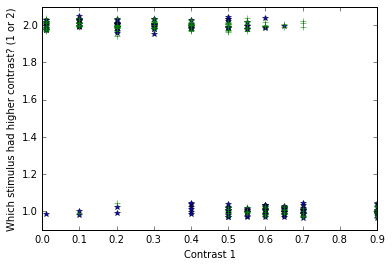

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(1)
# We apply a small vertical jitter to each point, just to show that there are
# multiple points at each location:
ax.plot(ortho['contrast1'], ortho['answer'] +
        np.random.randn(len(ortho)) * 0.02 , '*')
ax.plot(para['contrast1'], para['answer'] +
        np.random.randn(len(para)) * 0.02 , '+')
ax.set_ylim([0.9, 2.1])
ax.set_xlabel('Contrast 1')
ax.set_ylabel('Which stimulus had higher contrast? (1 or 2)')

In [4]:
fig.savefig('../img/figure1.png')

In [5]:
def transform_data(data):
    """
    Function that takes experimental data and gives us the dependent/independent
    variables for analysis

    Parameters
    ----------
    data : rec array
        The data with records: `contrast1`, `contrast2` and `answer`

    Returns
    -------
    x : The unique contrast differences.
    y : The proportion of '2' answers in each contrast difference
    n : The number of trials in each x,y condition
    """
    contrast1 = data['contrast1']
    answers = data['answer']

    x = np.unique(contrast1)
    y = []
    n = []

    for c in x:
        idx = np.where(contrast1 == c)
        n.append(float(len(idx[0])))
        answer1 = len(np.where(answers[idx] == 1)[0])
        y.append(answer1 / n[-1])

    return x,y,n


In [6]:
x_ortho, y_ortho, n_ortho = transform_data(ortho)
x_para, y_para, n_para = transform_data(para)


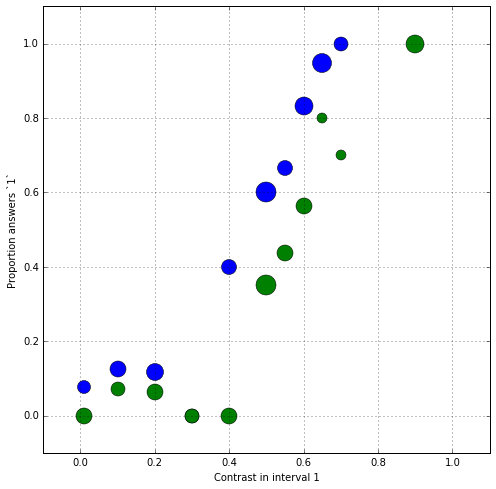

In [7]:
fig, ax = plt.subplots(1)
# To plot each point with size proportional to the number of trials in that condition:
for x,y,n in zip(x_ortho, y_ortho, n_ortho):
    ax.plot(x, y, 'bo', markersize=n)

for x,y,n in zip(x_para, y_para, n_para):
    ax.plot(x, y, 'go', markersize=n)

ax.set_xlabel('Contrast in interval 1')
ax.set_ylabel('Proportion answers `1`')
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-0.1, 1.1])
ax.grid('on')
fig.set_size_inches([8,8])


In [8]:
fig.savefig('../img/figure2.png')

In [9]:
np.polyfit(x_ortho, y_ortho, 1)

array([ 1.35193621, -0.07918802])

In [10]:
beta1_ortho, beta0_ortho = np.polyfit(x_ortho, y_ortho, 1)
beta1_para, beta0_para = np.polyfit(x_para, y_para, 1)


In [11]:
x = np.linspace(0, 1, 100)  # What does linspace do?
y_ortho_hat = np.polyval((beta1_ortho, beta0_ortho), x)
y_para_hat = np.polyval((beta1_para, beta0_para), x)


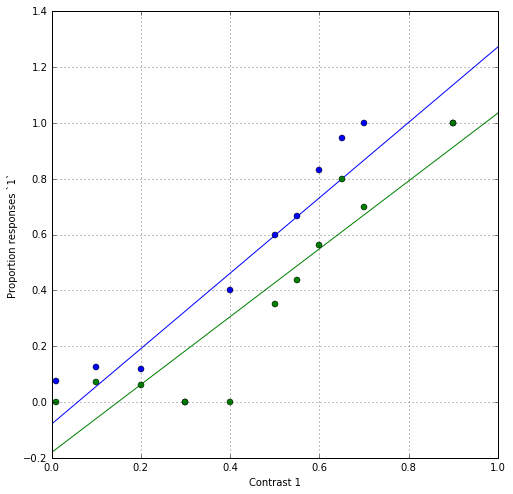

In [12]:
fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat)
ax.plot(x_ortho, y_ortho, 'bo')
ax.plot(x, y_para_hat)
ax.plot(x_para, y_para, 'go')
ax.set_xlabel('Contrast 1')
ax.set_ylabel('Proportion responses `1`')
ax.grid('on')
fig.set_size_inches([8,8])


In [13]:
fig.savefig('../img/figure3.png')

In [14]:
pse_ortho = (0.5 - beta0_ortho)/beta1_ortho
pse_para = (0.5 - beta0_para)/beta1_para


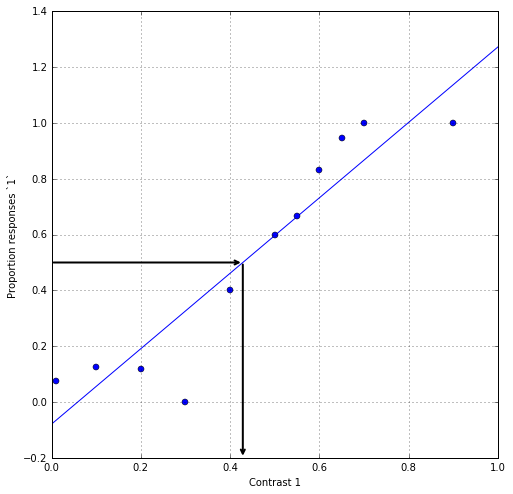

In [24]:
fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat)
ax.plot(x_ortho, y_ortho, 'bo')


ax.set_xlabel('Contrast 1')
ax.set_ylabel('Proportion responses `1`')
ax.grid('on')

ax.annotate("",
            xy=(0, 0.5), xycoords='data',
            xytext=(pse_ortho, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="<-",linewidth=2,
                            connectionstyle="arc3"),
            )


ax.annotate("",
            xy=(pse_ortho, 0.5), xycoords='data',
            xytext=(pse_ortho, -0.2), textcoords='data',
            arrowprops=dict(arrowstyle="<-", linewidth=2,
                            connectionstyle="arc3"),
            )
fig.set_size_inches([8,8])
fig.savefig('../img/figure4.png')

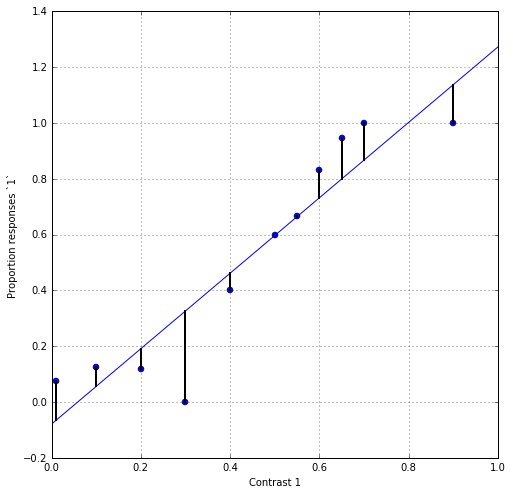

In [25]:

fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat)
ax.plot(x_ortho, y_ortho, 'bo')
ax.set_xlabel('Contrast 1')
ax.set_ylabel('Proportion responses `1`')
ax.grid('on')
for xx, yy in zip(x_ortho, y_ortho):
    plt.plot([xx, xx], [yy, np.polyval((beta1_ortho, beta0_ortho), xx)], 'k', linewidth=2)

fig.set_size_inches([8,8])
fig.savefig('../img/figure5.png')